In [1]:
import pandas as pd
import os 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score

In [2]:
df = pd.read_pickle('../../data/processed/merged/state0_new_df.pkl')
print(df.shape)

(16574, 15)


In [3]:
df = df.drop(columns=['is_ios', 'eventType', 'eventSampleSpeed', 'eventGPSSignalStrength', 'eventSensorDetectionMthd', 'source_file'])
df = df.dropna(subset=['bearingAngleChange'])
corr_matrix = df.corr()

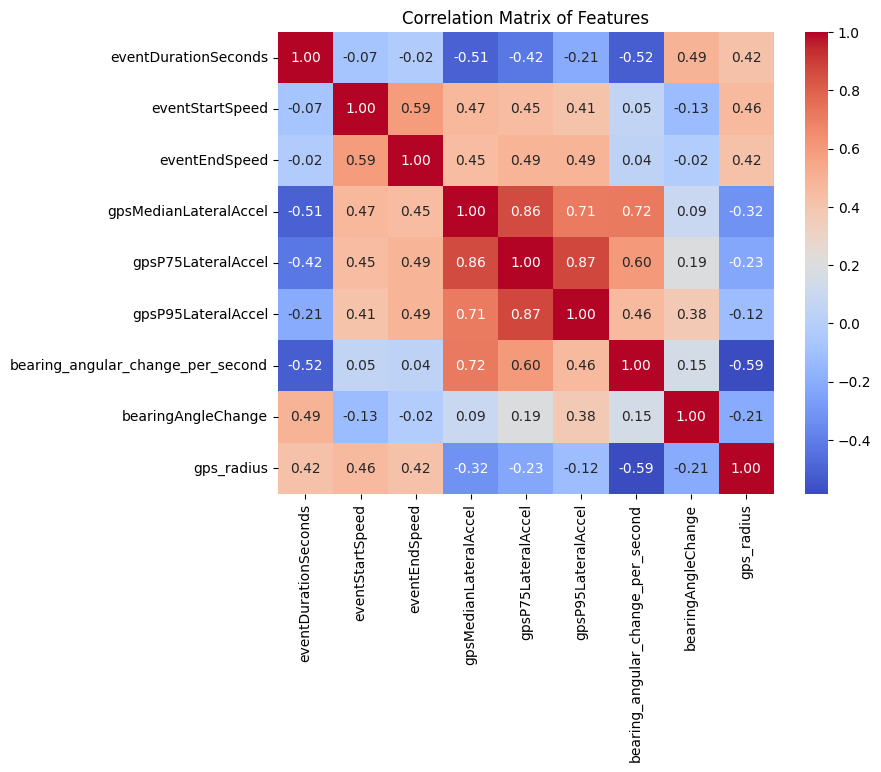

In [4]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Features")
plt.show()

In [5]:
df = df.drop(columns=['gpsP75LateralAccel', 'gpsP95LateralAccel'])
corr_matrix = df.corr()

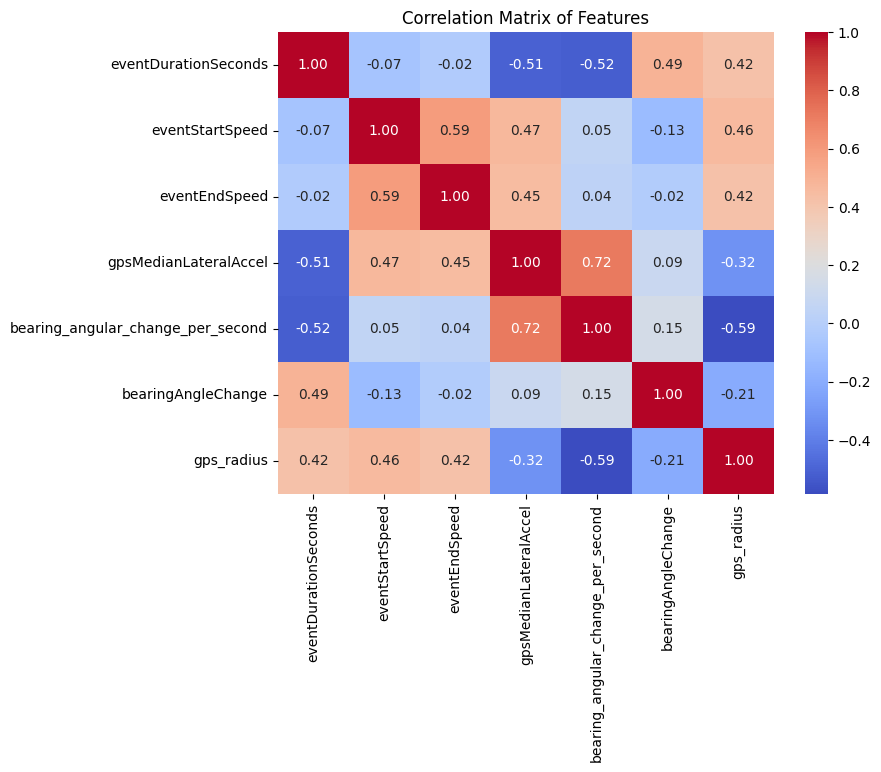

In [6]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Features")
plt.show()

In [7]:
# Standardize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

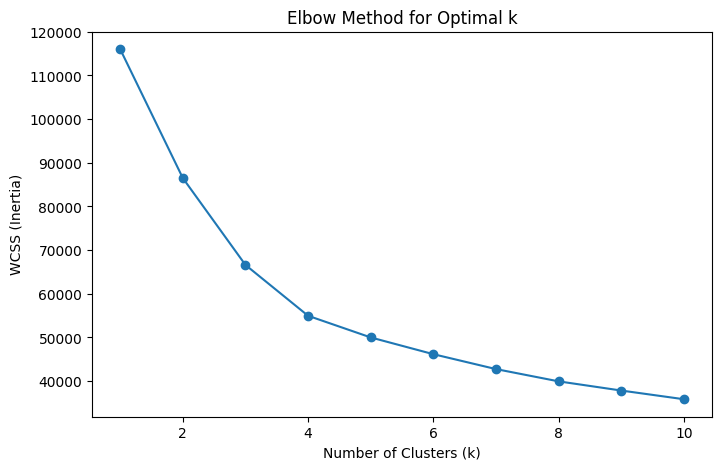

In [8]:
# Use elbow method to get optimal number of clusters
wcss = []
k_range = range(1, 11) 

for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.show()

,k,Silhouette Score,Calinski-Harabasz Score
0,2,0.251405,5654.796466
1,3,0.287686,6145.933523
2,4,0.300683,6135.810925
3,5,0.249406,5330.375659
4,6,0.218774,5012.927101
5,7,0.214401,4681.035040
6,8,0.230185,4490.436913
7,9,0.218117,4267.136328
8,10,0.220238,4115.075396


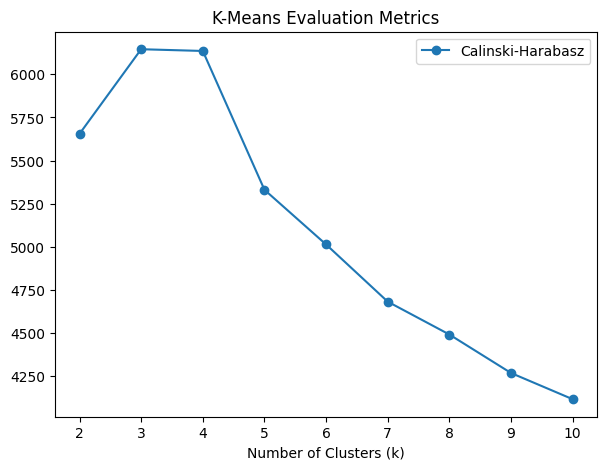

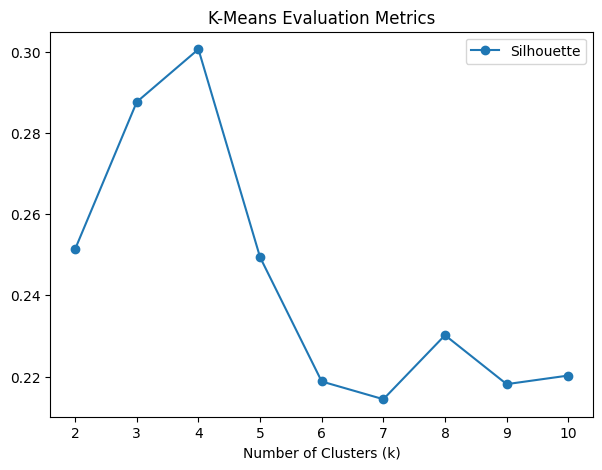

In [9]:
results = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_df)
    labels = kmeans.labels_
    
    sil_score = silhouette_score(scaled_df, labels)
    ch_score = calinski_harabasz_score(scaled_df, labels)
    
    results.append({
        'k': k,
        'Silhouette Score': sil_score,
        'Calinski-Harabasz Score': ch_score
    })
    
    scaled_df_clustered = scaled_df.copy()
    scaled_df_clustered['klabel'] = labels

results_df = pd.DataFrame(results)
display(results_df)

plt.figure(figsize=(7, 5))
plt.plot(results_df['k'], results_df['Calinski-Harabasz Score'], marker='o', label='Calinski-Harabasz')
plt.title('K-Means Evaluation Metrics')
plt.xlabel('Number of Clusters (k)')
plt.legend()
plt.show()

plt.figure(figsize=(7, 5))
plt.plot(results_df['k'], results_df['Silhouette Score'], marker='o', label='Silhouette')
plt.title('K-Means Evaluation Metrics')
plt.xlabel('Number of Clusters (k)')
plt.legend()
plt.show()

/Users/connieyang/Documents/GitHub/ARITY-BTT-PROJECT-1/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


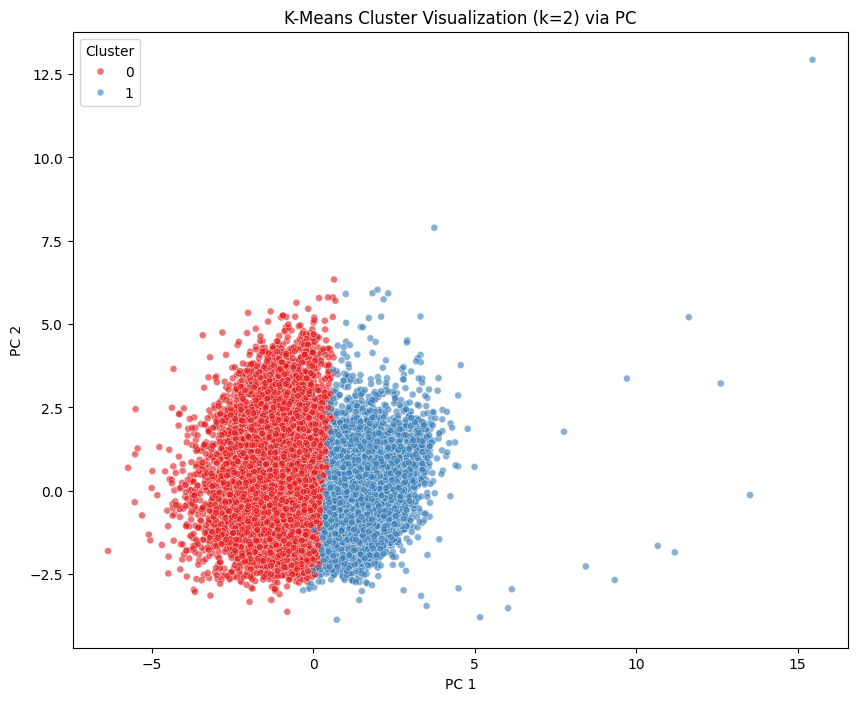

/Users/connieyang/Documents/GitHub/ARITY-BTT-PROJECT-1/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


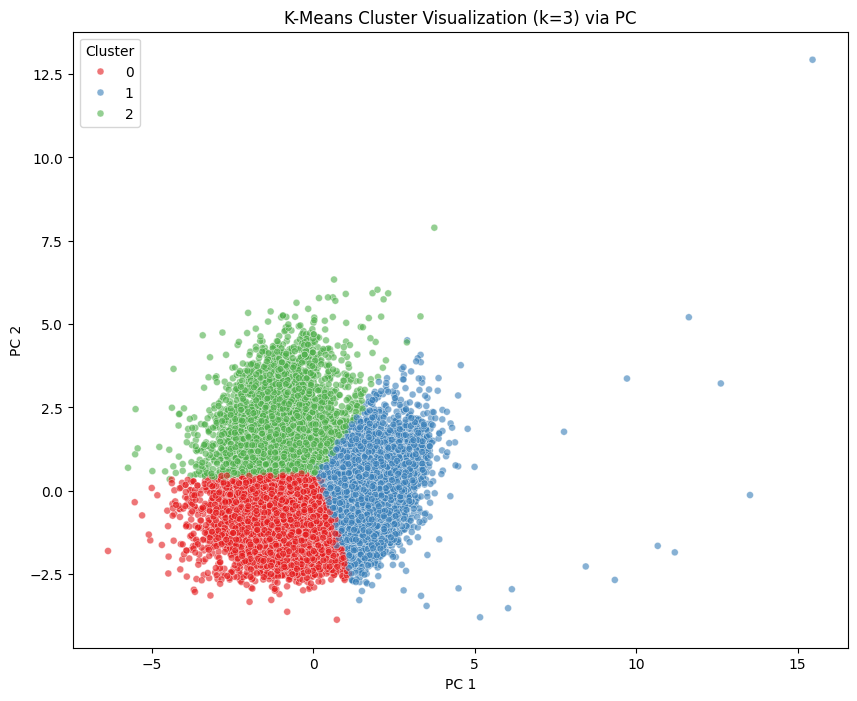

/Users/connieyang/Documents/GitHub/ARITY-BTT-PROJECT-1/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


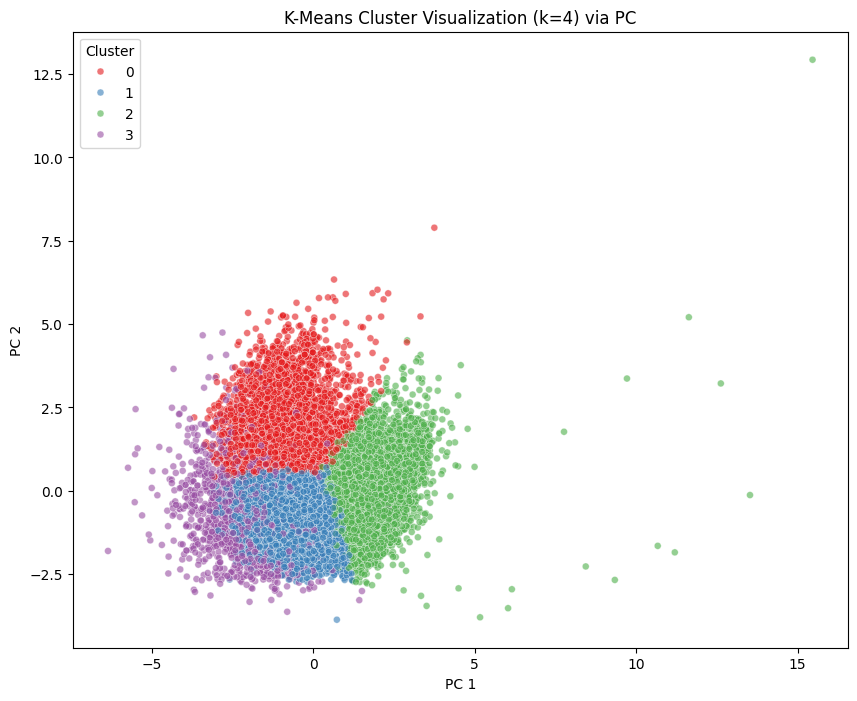

/Users/connieyang/Documents/GitHub/ARITY-BTT-PROJECT-1/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


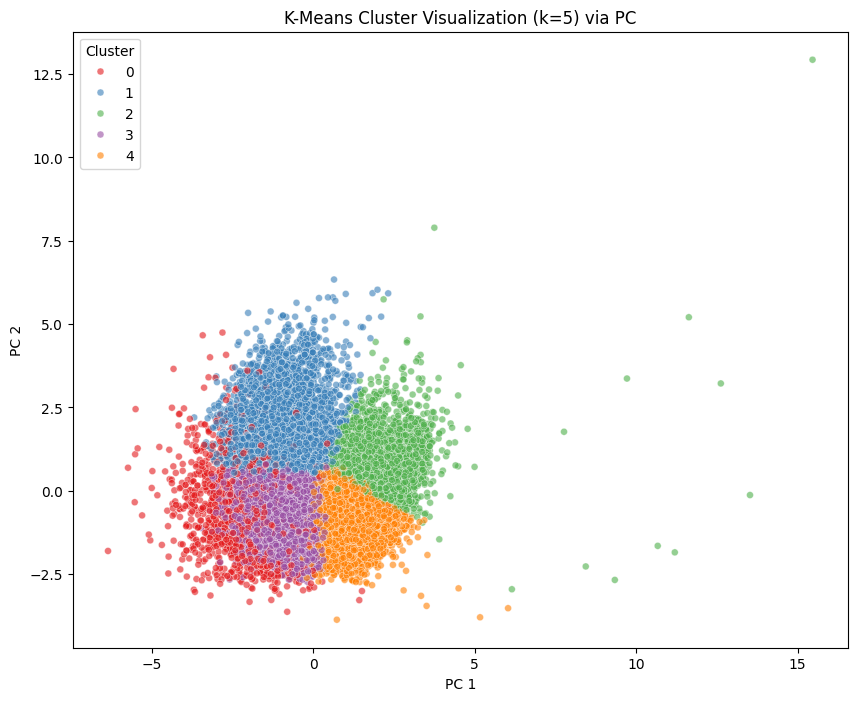

/Users/connieyang/Documents/GitHub/ARITY-BTT-PROJECT-1/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


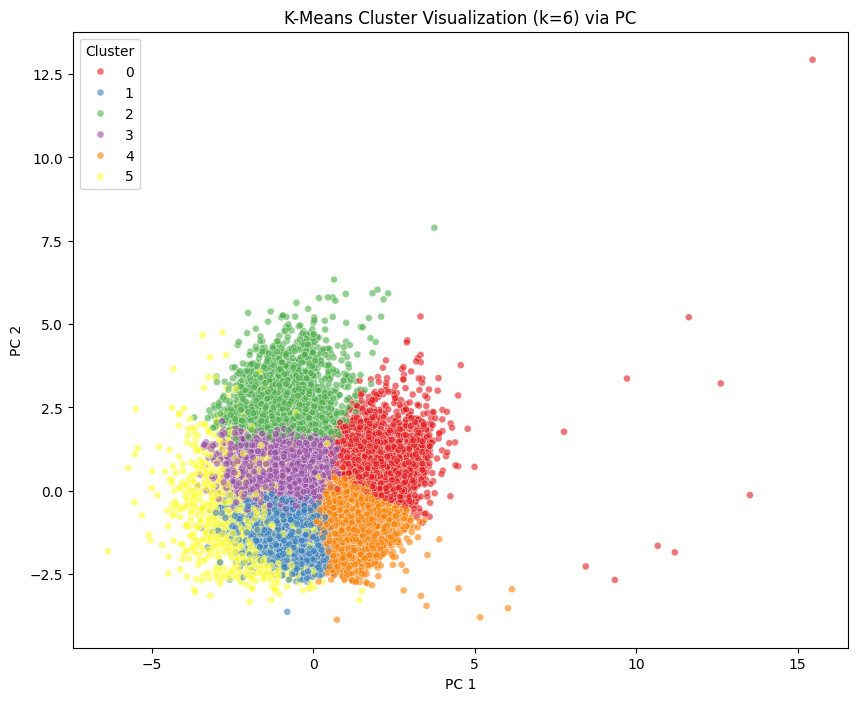

/Users/connieyang/Documents/GitHub/ARITY-BTT-PROJECT-1/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


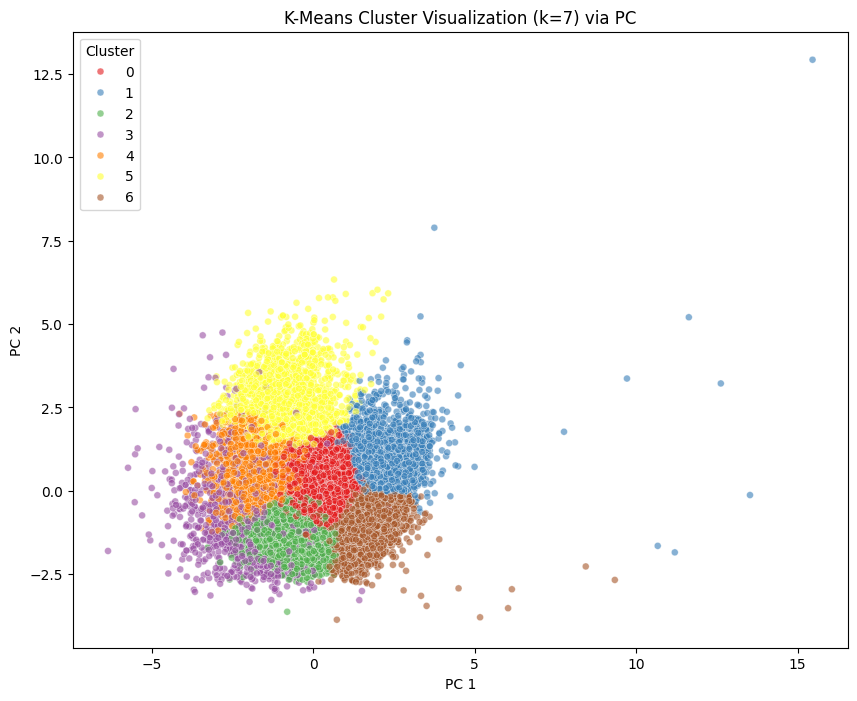

/Users/connieyang/Documents/GitHub/ARITY-BTT-PROJECT-1/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


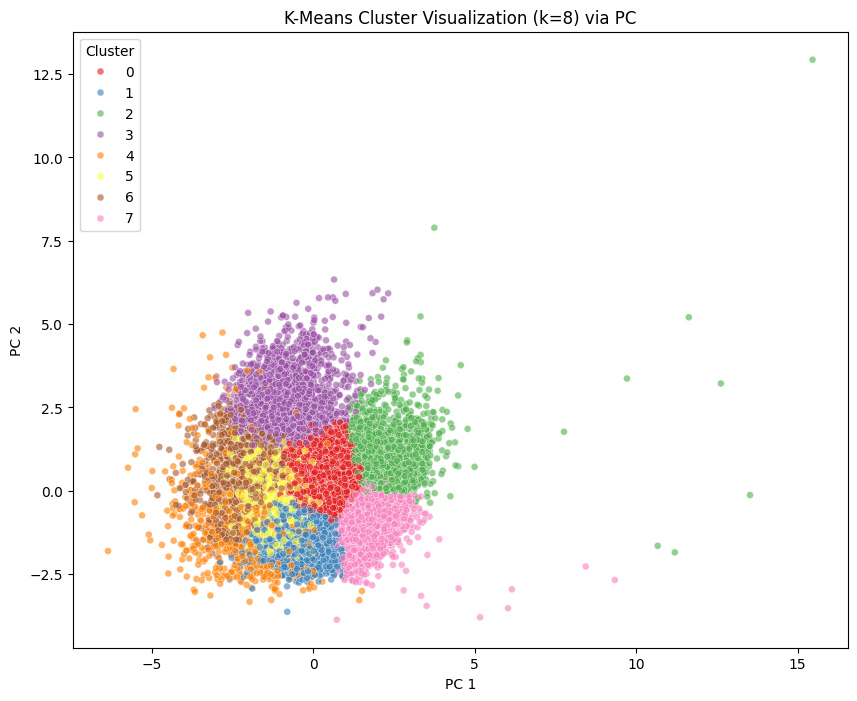

/Users/connieyang/Documents/GitHub/ARITY-BTT-PROJECT-1/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


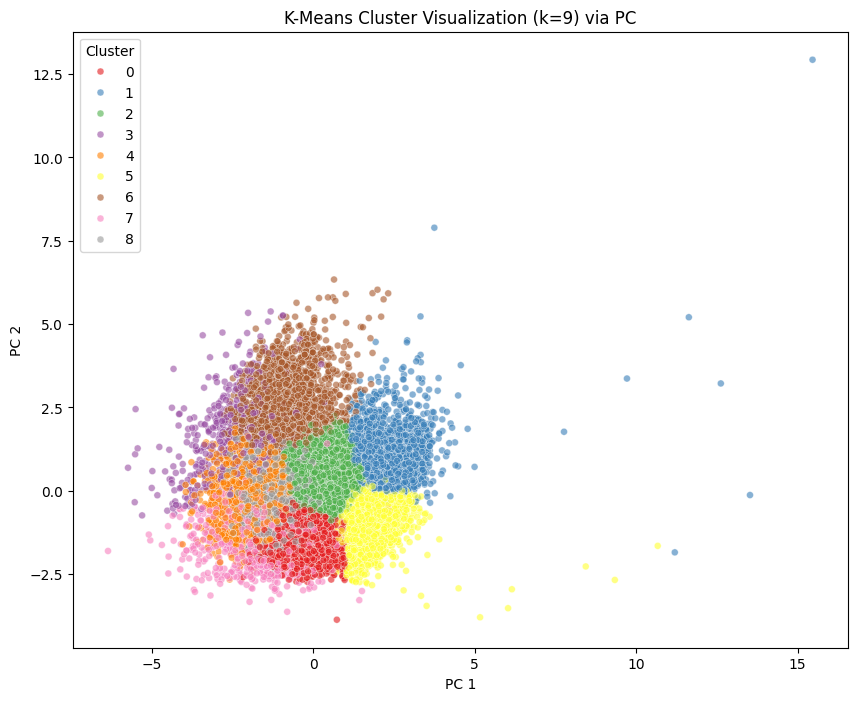

/Users/connieyang/Documents/GitHub/ARITY-BTT-PROJECT-1/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


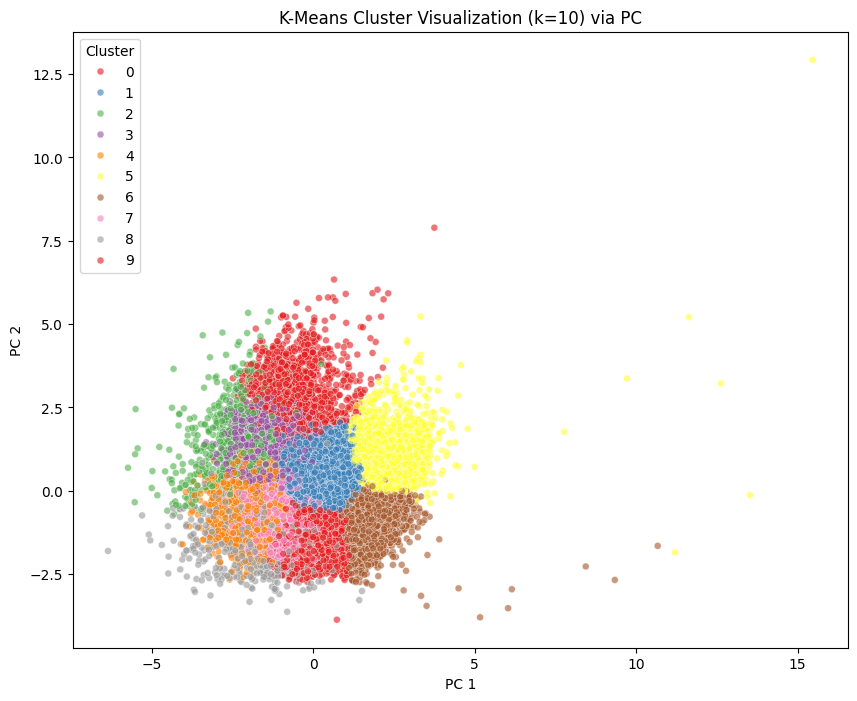

In [10]:
for i in range(2, 11):    
    kmeans_final = KMeans(n_clusters=i, n_init=10)
    kmeans_final.fit(scaled_df)
    final_labels = kmeans_final.labels_

    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(scaled_df)
    pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
    pca_df['Cluster_Label'] = final_labels

    cluster_centers_pca = pca.transform(kmeans_final.cluster_centers_)

    plt.figure(figsize=(10, 8))
    sns.scatterplot(
        x='PC1', 
        y='PC2', 
        hue='Cluster_Label',
        data=pca_df, 
        palette='Set1',
        alpha=0.6,
        s=25
    )

    plt.title(f'K-Means Cluster Visualization (k={i}) via PC')
    plt.xlabel(f'PC 1')
    plt.ylabel(f'PC 2')
    plt.legend(title='Cluster')
    plt.show()

/var/folders/gb/z580gbzd2snggl2ym34nk9000000gn/T/ipykernel_10202/1138081431.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


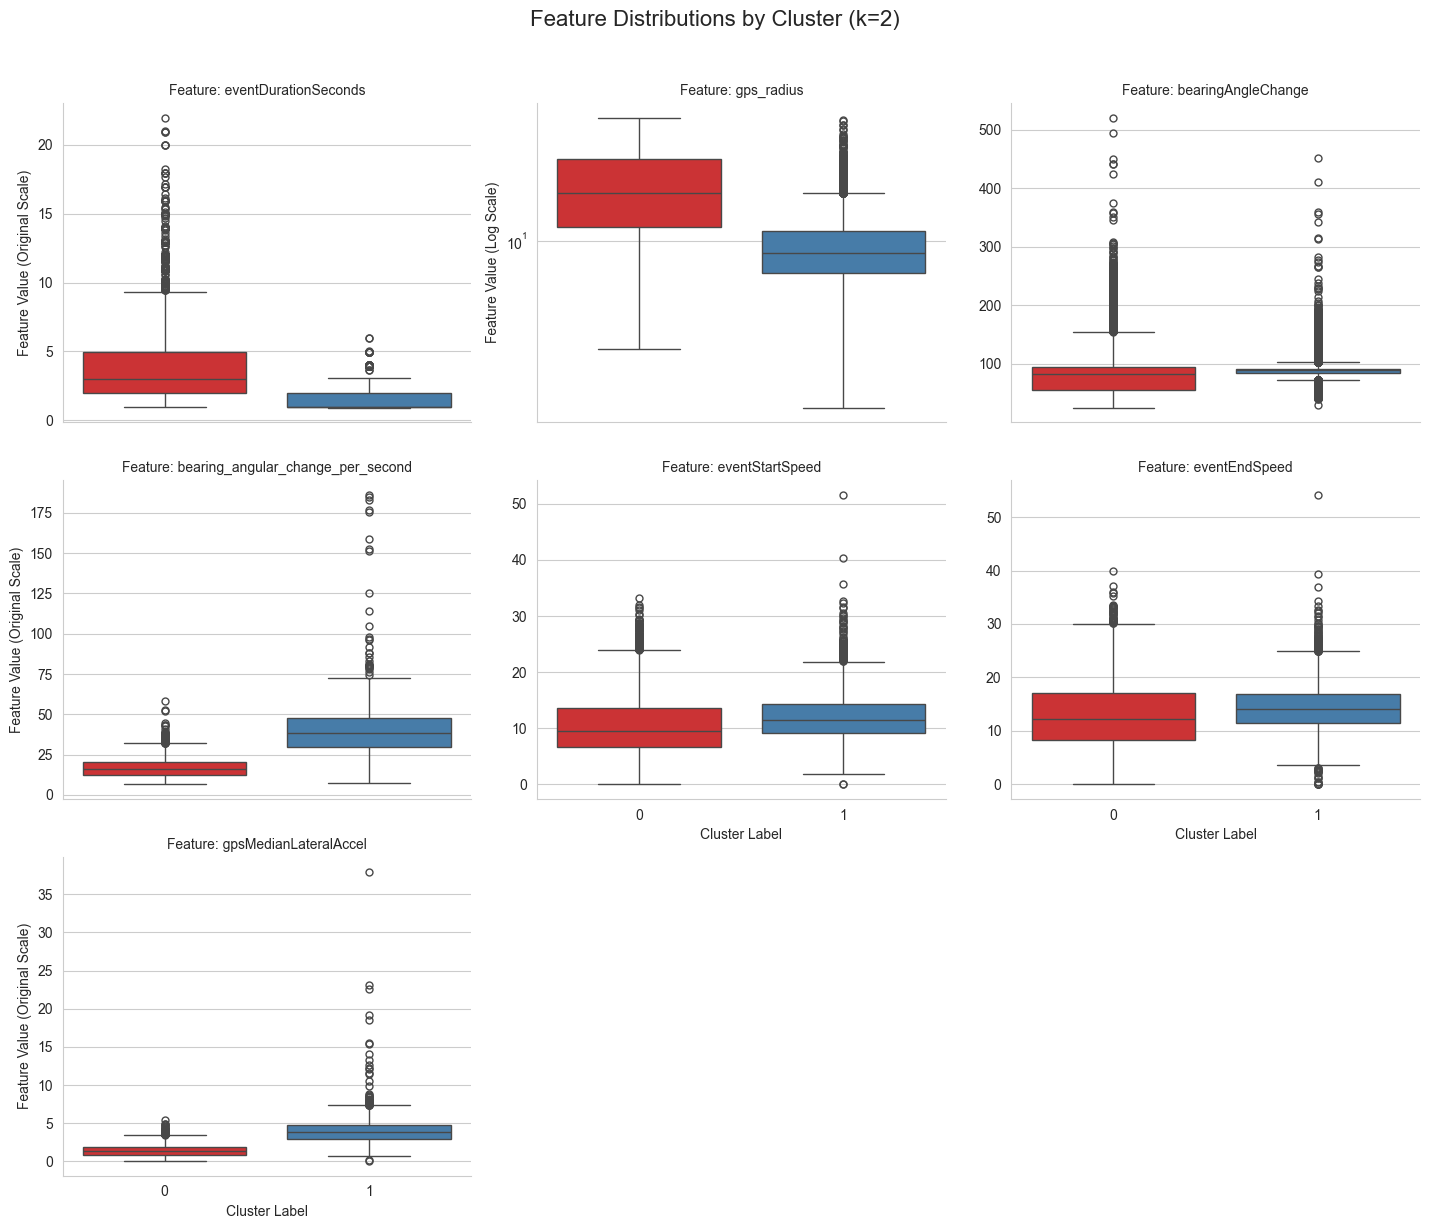

/var/folders/gb/z580gbzd2snggl2ym34nk9000000gn/T/ipykernel_10202/1138081431.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


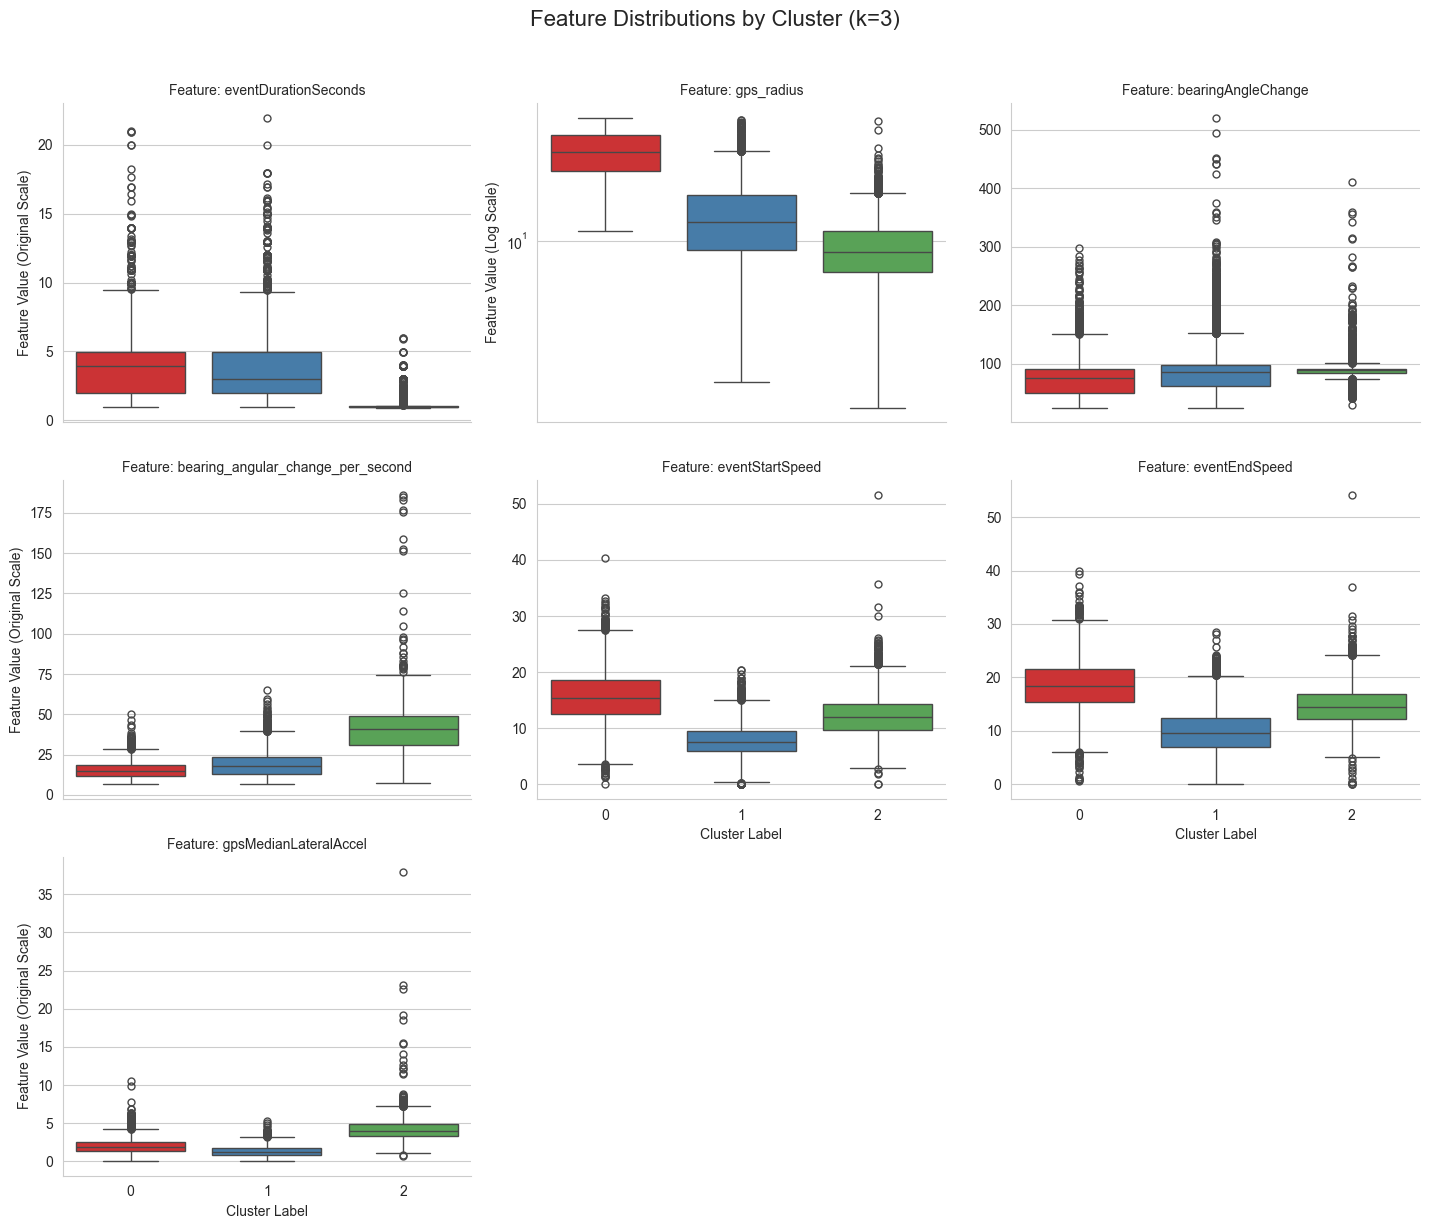

/var/folders/gb/z580gbzd2snggl2ym34nk9000000gn/T/ipykernel_10202/1138081431.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


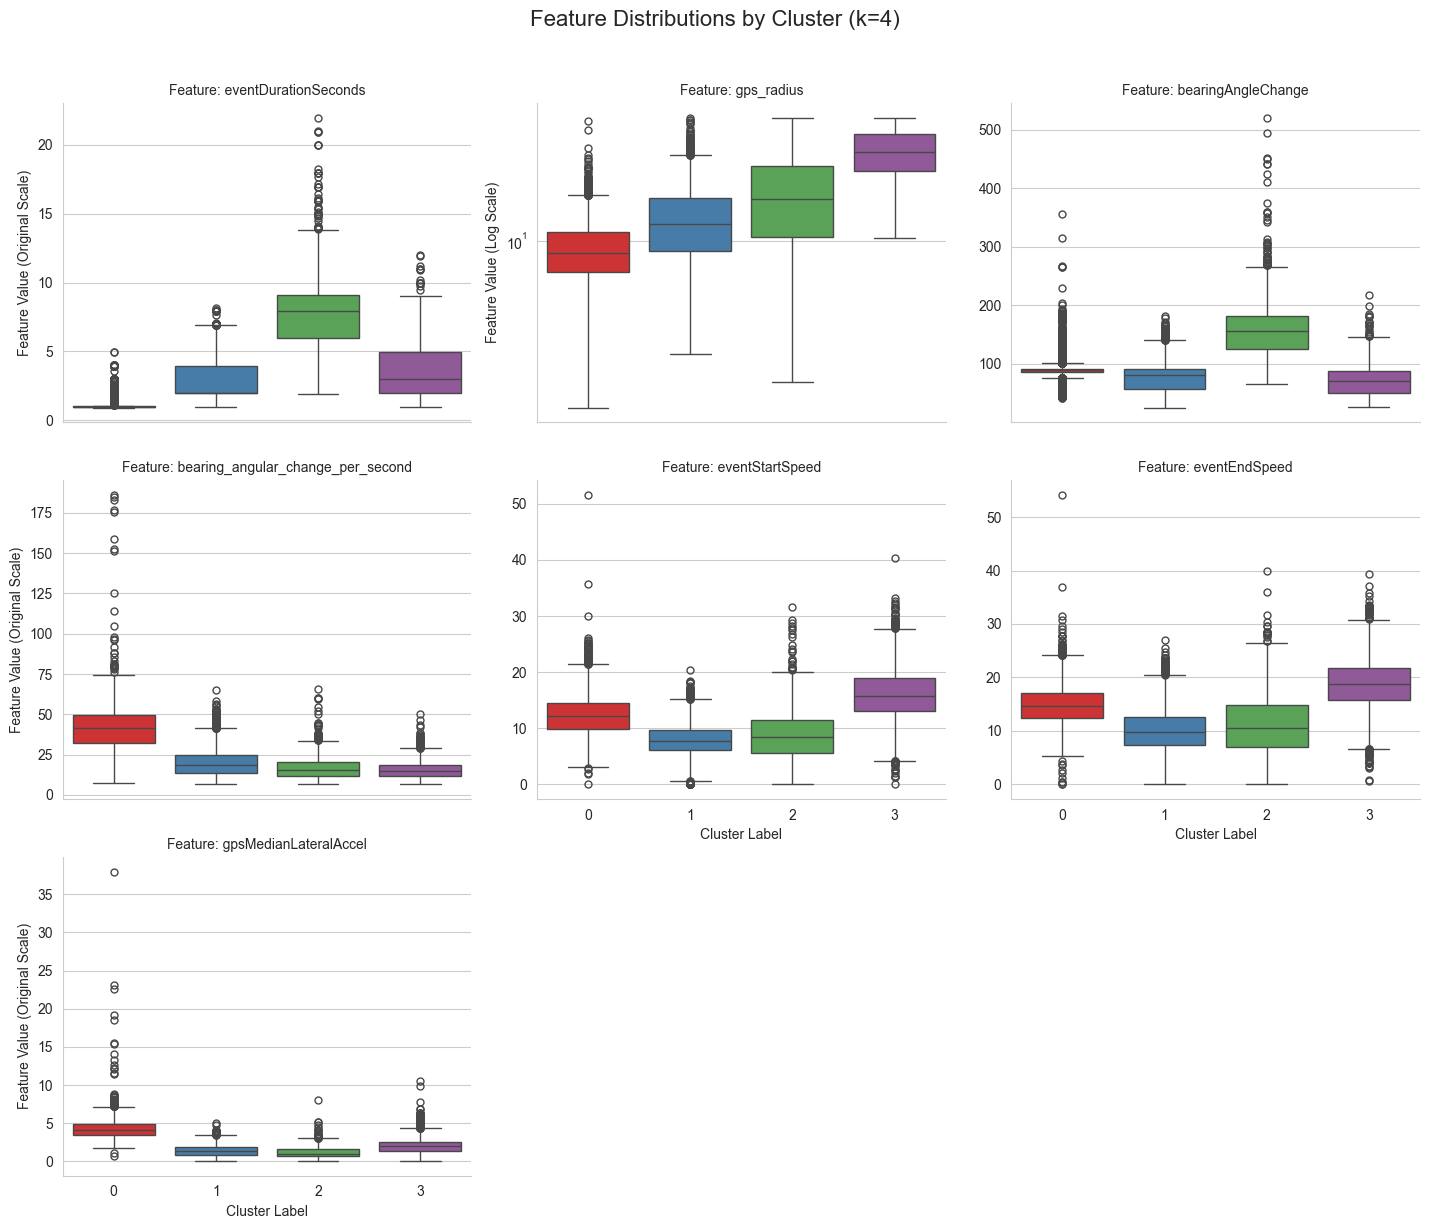

/var/folders/gb/z580gbzd2snggl2ym34nk9000000gn/T/ipykernel_10202/1138081431.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


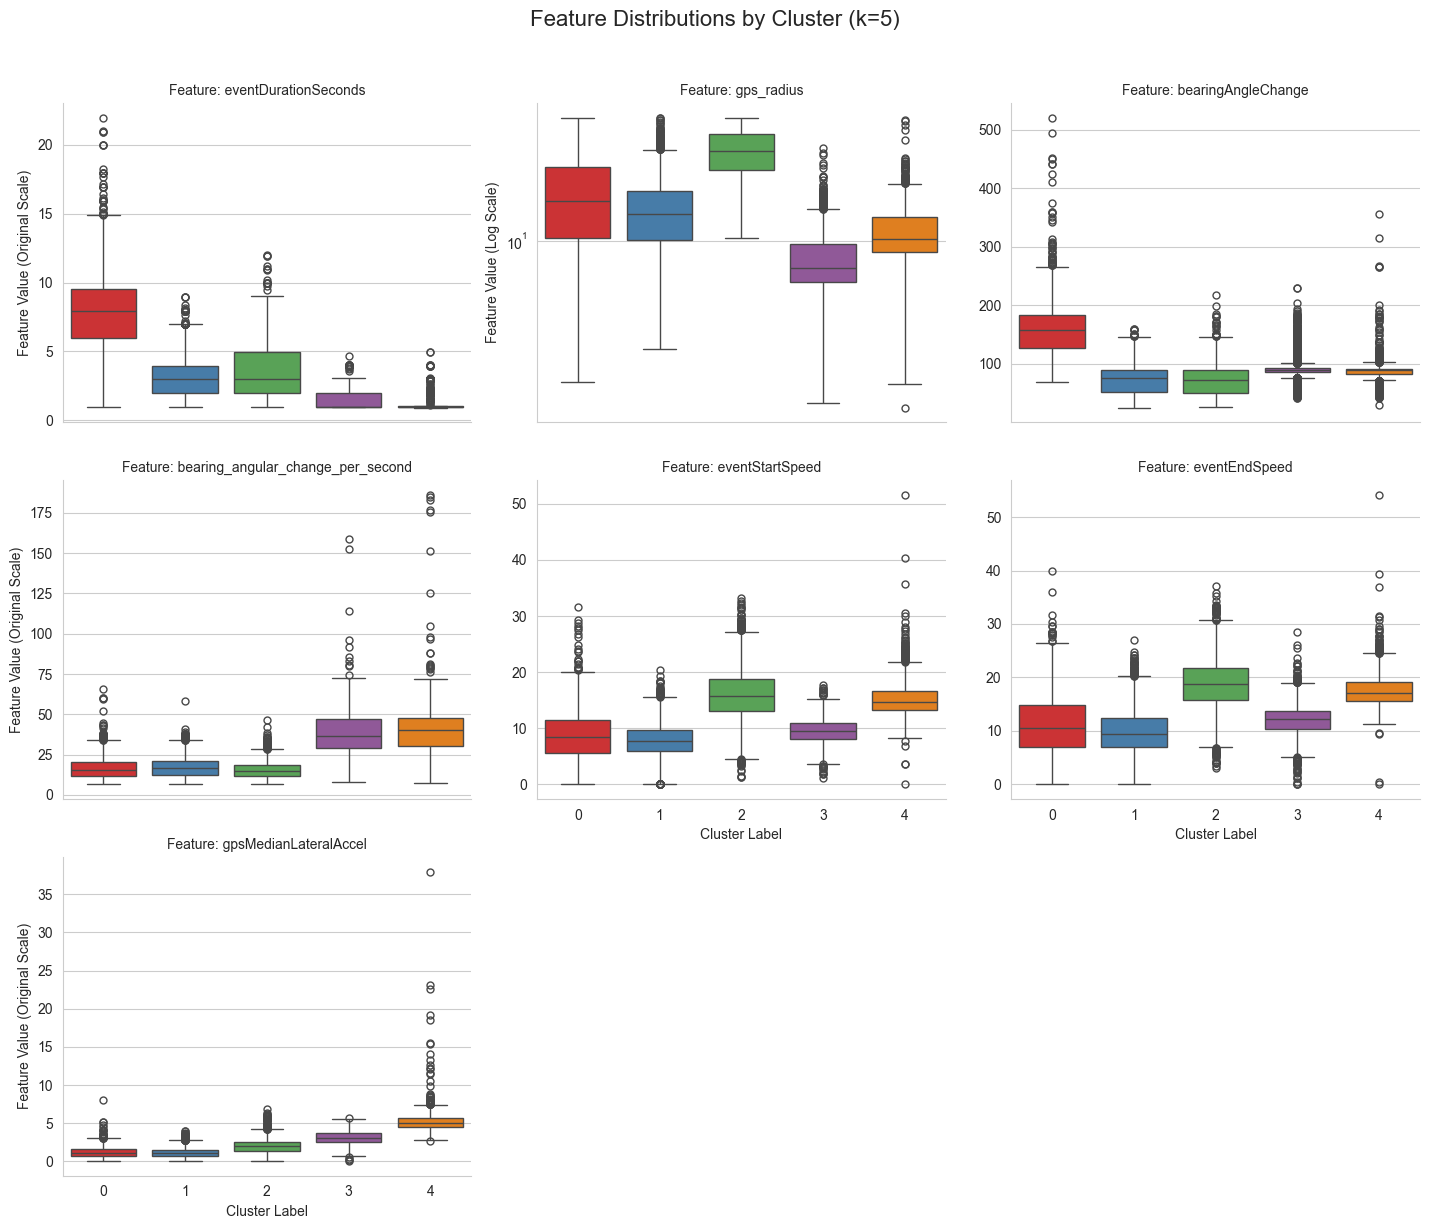

/var/folders/gb/z580gbzd2snggl2ym34nk9000000gn/T/ipykernel_10202/1138081431.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


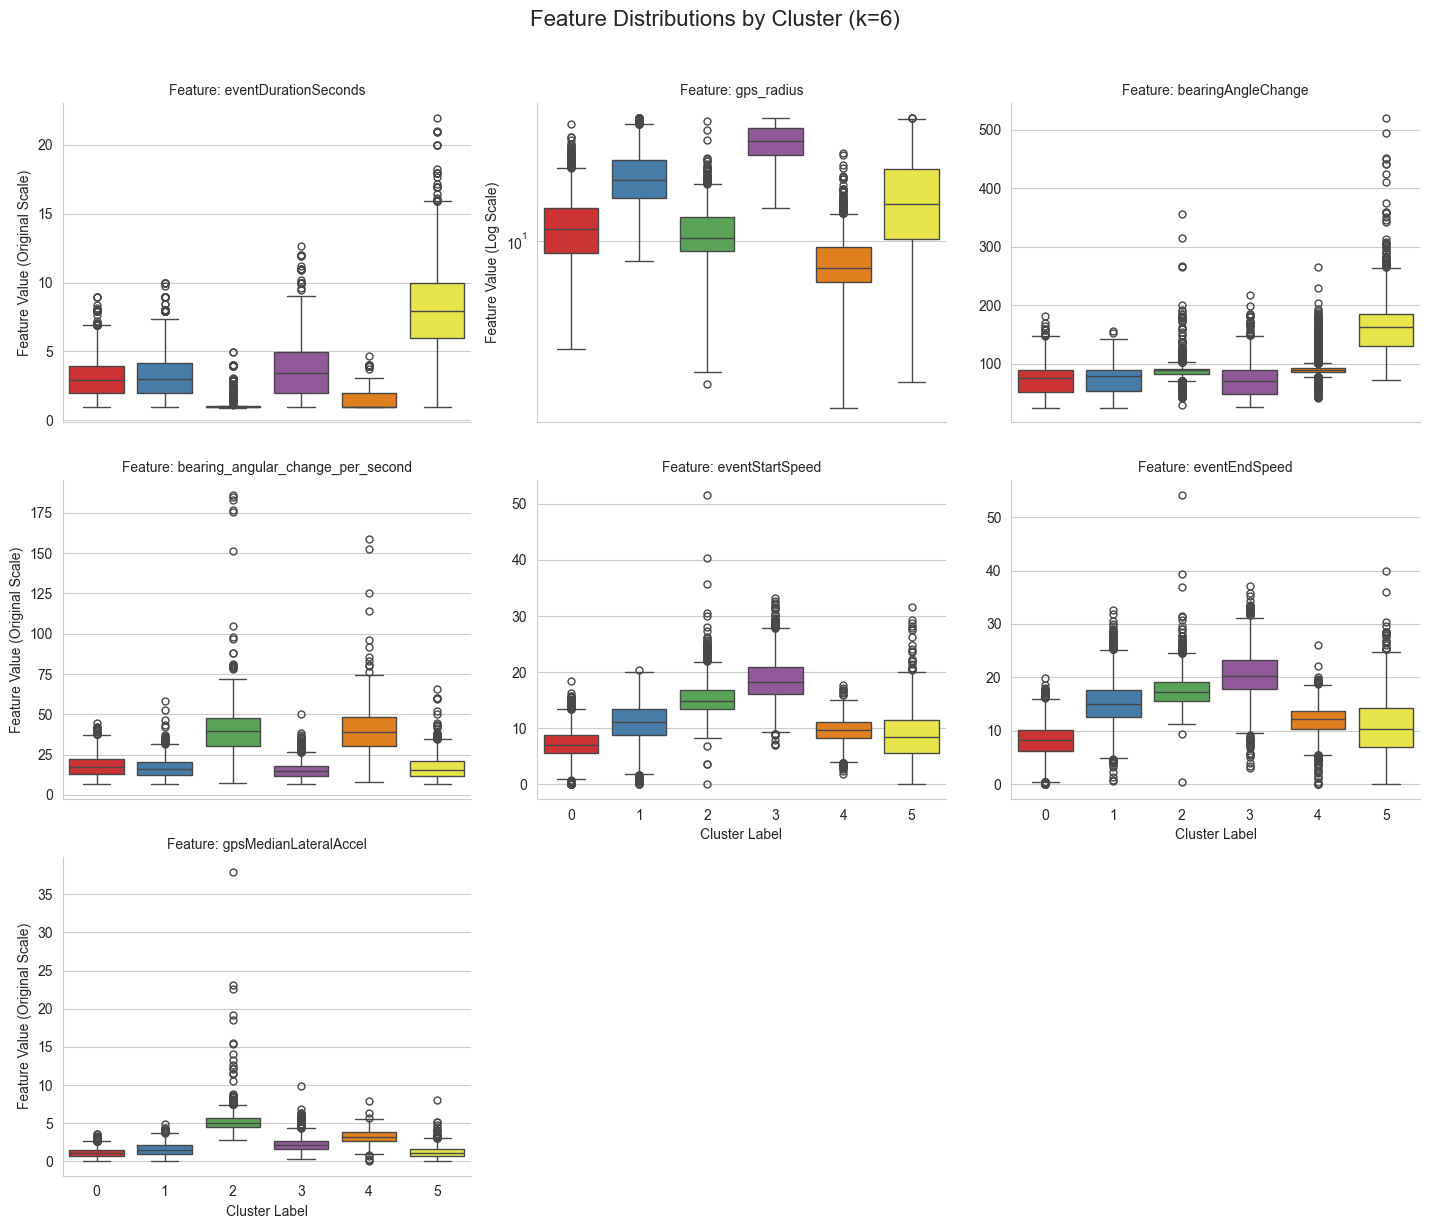

/var/folders/gb/z580gbzd2snggl2ym34nk9000000gn/T/ipykernel_10202/1138081431.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


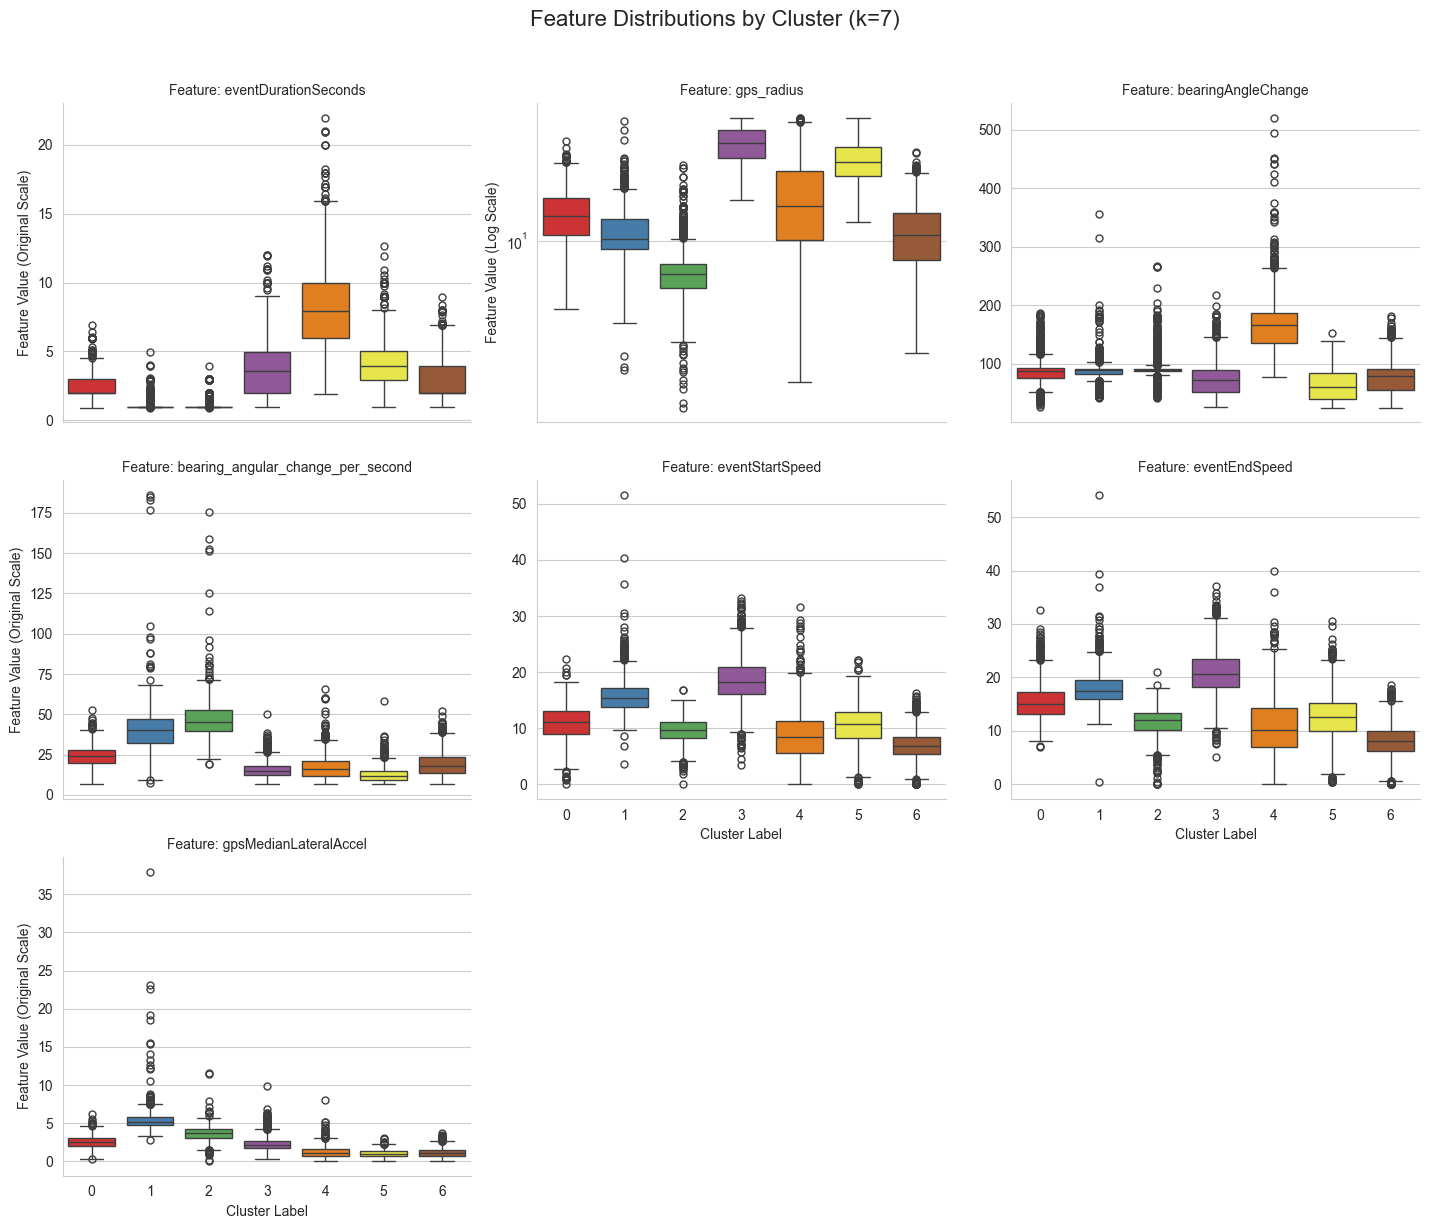

/var/folders/gb/z580gbzd2snggl2ym34nk9000000gn/T/ipykernel_10202/1138081431.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


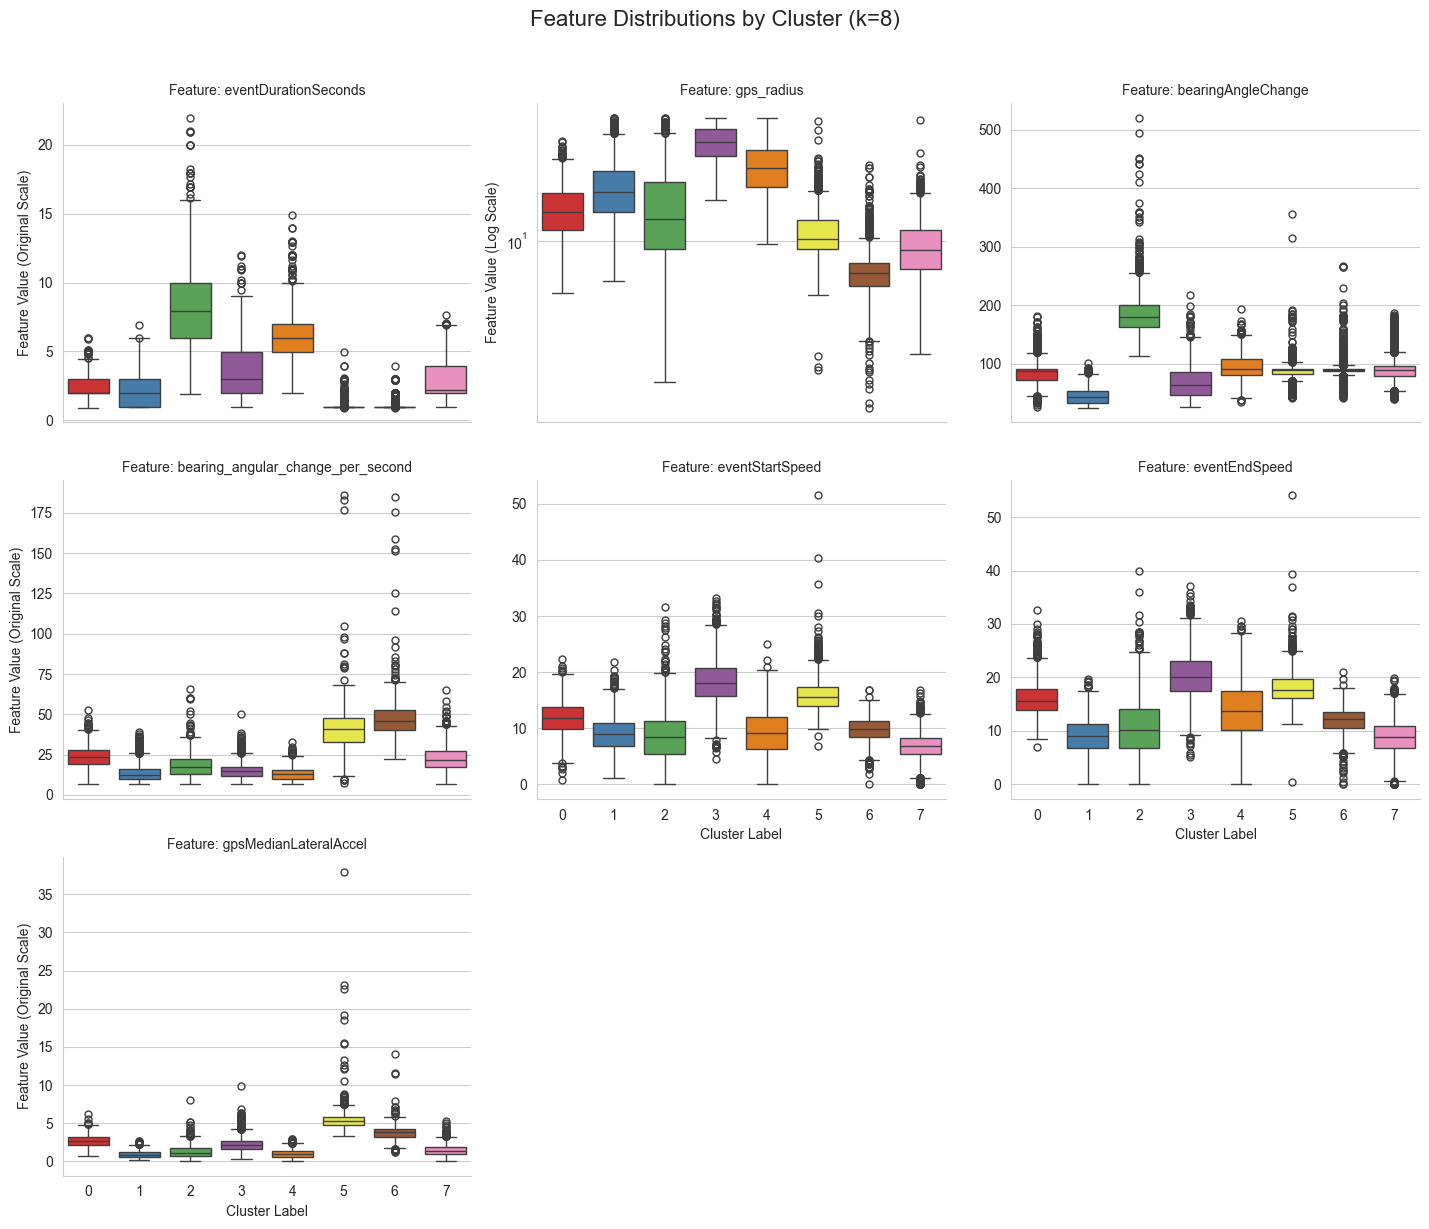

/var/folders/gb/z580gbzd2snggl2ym34nk9000000gn/T/ipykernel_10202/1138081431.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


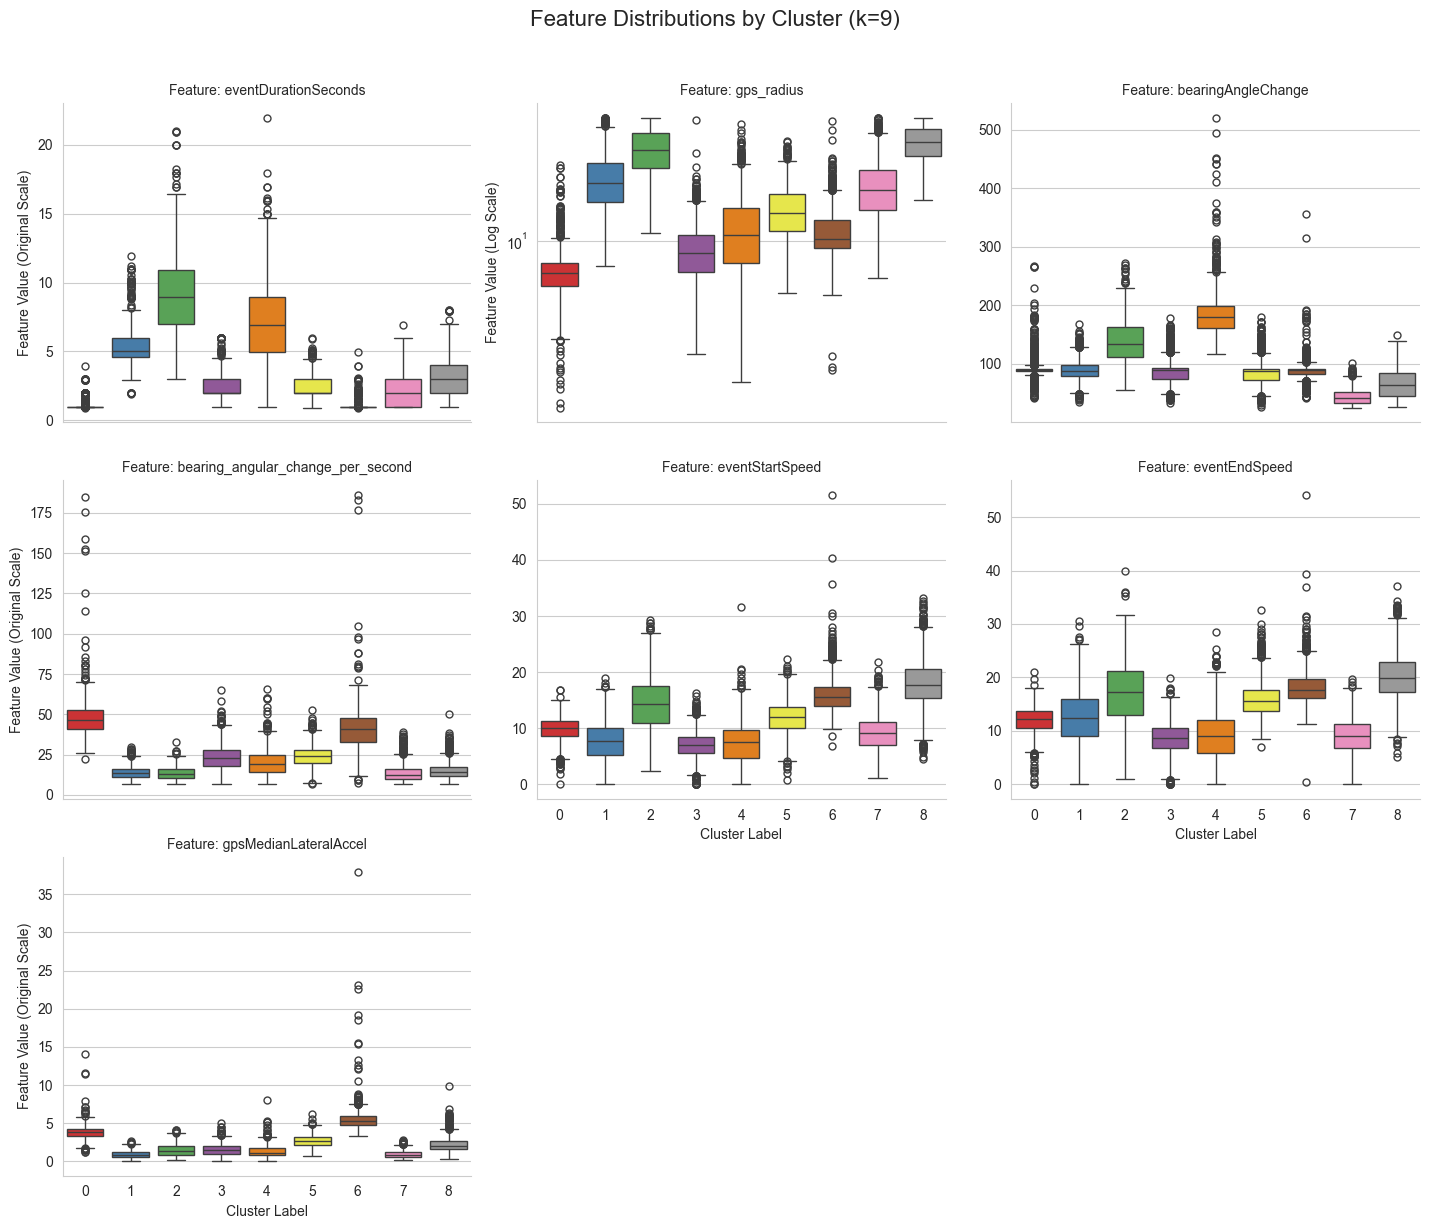

/var/folders/gb/z580gbzd2snggl2ym34nk9000000gn/T/ipykernel_10202/1138081431.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


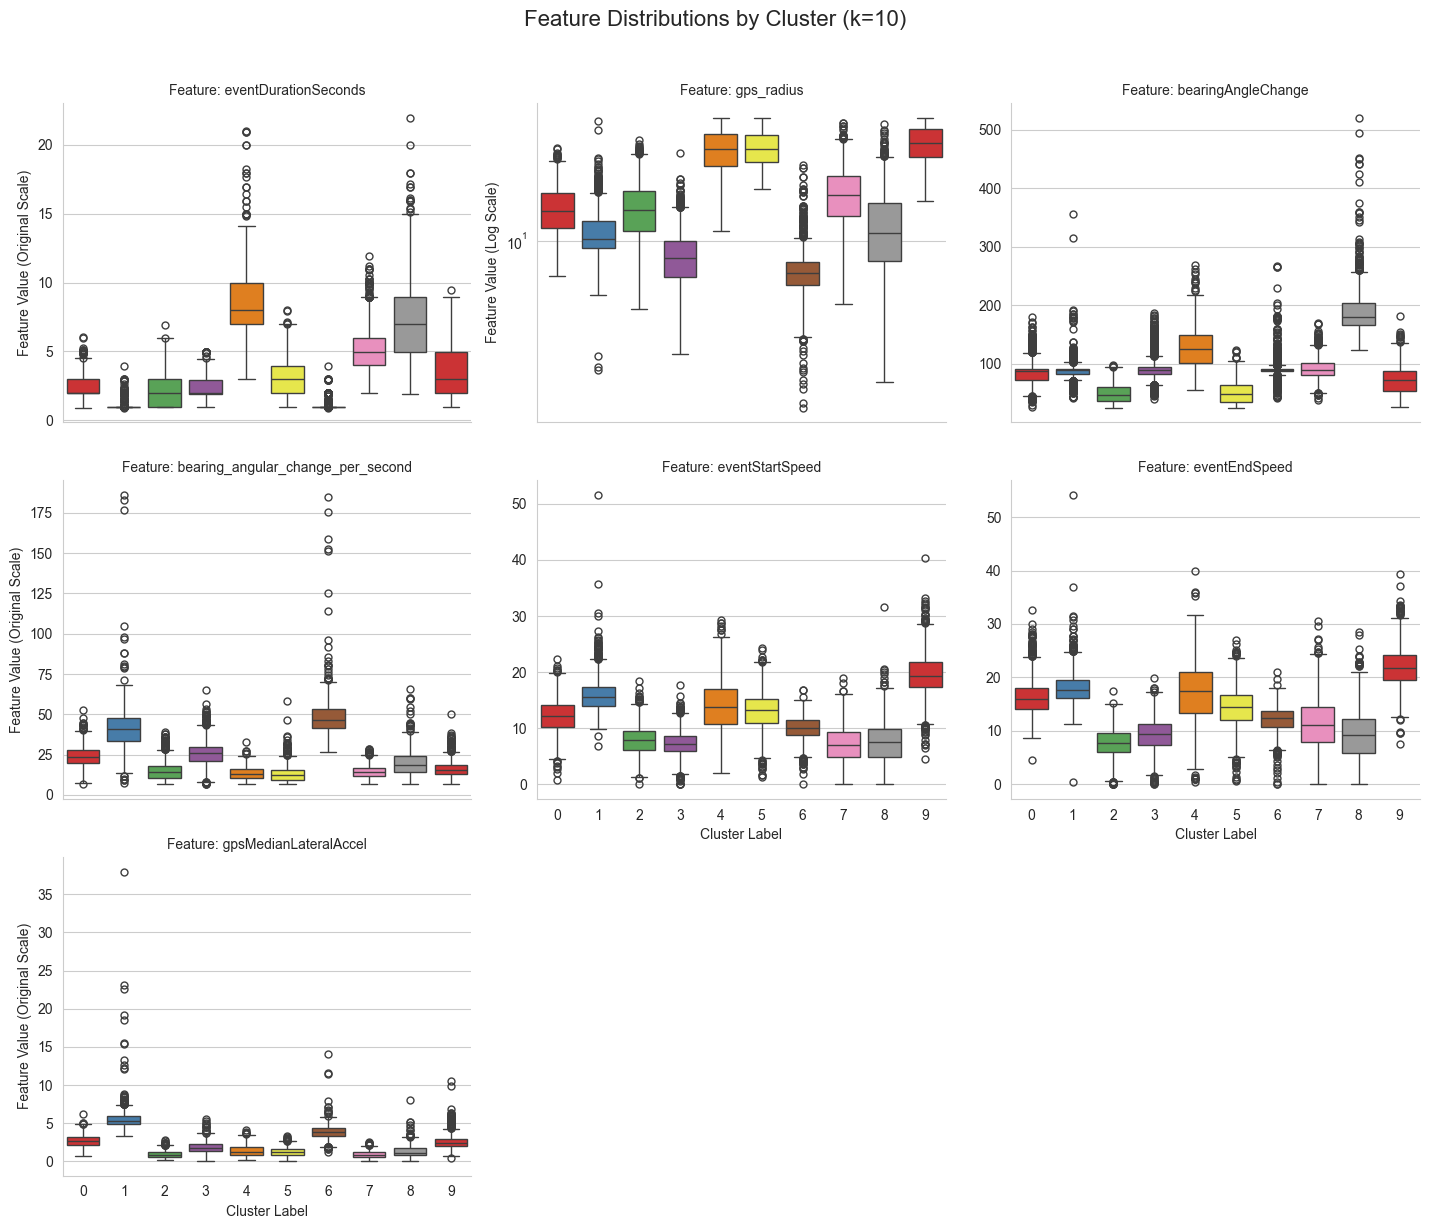

In [11]:
features_to_plot = [
    'eventDurationSeconds',
    'gps_radius',
    'bearingAngleChange',
    'bearing_angular_change_per_second',
    'eventStartSpeed',
    'eventEndSpeed',
    'gpsMedianLateralAccel'
]

for i in range(2, 11):
    kmeans_final = KMeans(n_clusters=i, n_init=10) 
    kmeans_final.fit(scaled_df)
    final_labels = kmeans_final.labels_

    df_clustered = df.copy()


    df_clustered['Cluster_Label'] = final_labels
    df_clustered['Cluster_Label'] = df_clustered['Cluster_Label'].astype('category')

    df_melted = df_clustered[['Cluster_Label'] + features_to_plot].melt(
        id_vars=['Cluster_Label'],
        var_name='Feature',
        value_name='Value'
    )

    sns.set_style("whitegrid")
    g = sns.catplot(
        data=df_melted,
        x='Cluster_Label',
        y='Value',
        col='Feature',
        kind='box', 
        col_wrap=3, 
        palette='Set1',
        sharey=False,
        height=4,
        aspect=1.2  
    )

    g.fig.suptitle(f'Feature Distributions by Cluster (k={i})', y=1.02, fontsize=16)
    g.set_titles("Feature: {col_name}", size=10)
    g.set_axis_labels("Cluster Label", "Feature Value (Original Scale)", size=10) 
    for ax in g.axes.flat:
        if 'gps_radius' in ax.get_title():
            ax.set_yscale('log')
            ax.set_ylabel("Feature Value (Log Scale)", size=10)

    plt.tight_layout()
    plt.show()